<a href="https://colab.research.google.com/github/bassamadnan/neural-network-classification-tf/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Problem
Classification problem involves identifying something as one thing or another, these may be categorized into
- Binary Classification
- Multiclass Classification
- Multilabel Classification



### Architecture of a typical classification neural network classification model
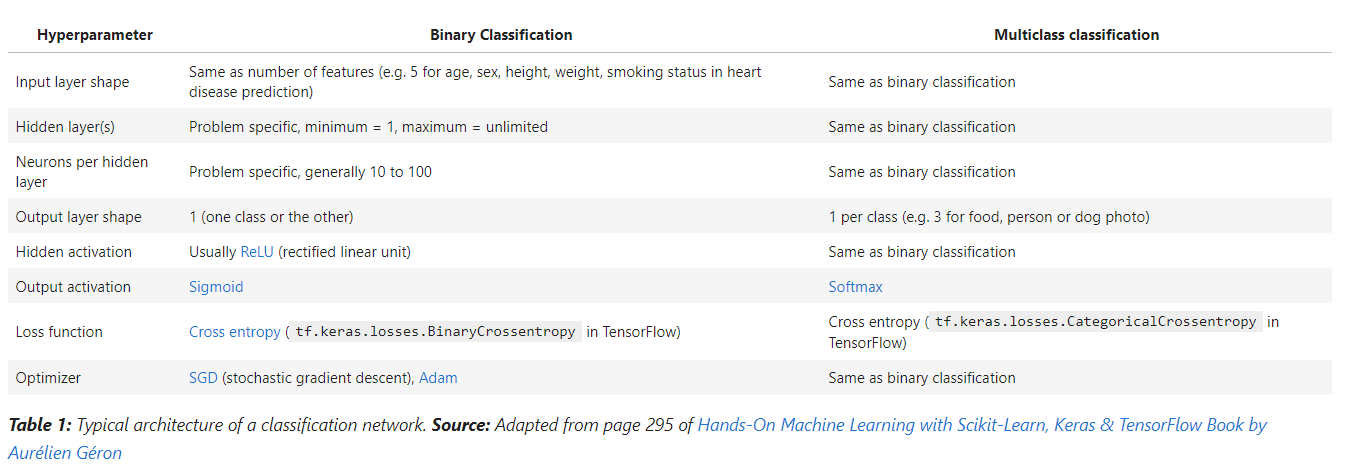

# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check the features
X[:4]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277]])

In [ ]:
# Check the labels
y[:4]

array([1, 1, 1, 1])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


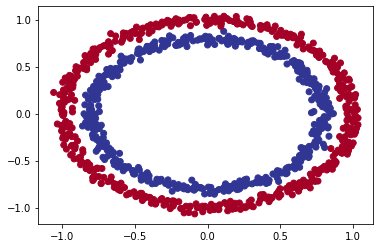

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
len(X), len(y)

(1000, 1000)

# Steps in modelling
- Create or import the model
- Comple the model
- Fit the model
- Evaluate the model
- Tweak
- Evaluate..


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)
# Heres where its going to be different
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"] 
    )

model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.7406 - accuracy: 0.4925
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7410 - accuracy: 0.4992
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.4961
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4986
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5012


In [ ]:
# Trying to improve the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

In [ ]:
# 50% accuracy 🤔
# Trying to add another layer
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)
# Heres where its going to be different
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"] 
    )

model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934061050415039, 0.5]

In [ ]:
# About the same loss even with an extra layer, the accuracy is still 50 

## Improving the model
What we might try and do is
- Create a model - add more layers or increase the number of hidden units within a layer.
- Compiling a model - we might want to try and use a different optimizer function such as Adam.
- Fitting a model - perhaps fit the model for more epochs (leave it for training for longer).


In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add a 100 dense neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2, 100)            200       
                                                                 
 dense_12 (Dense)            (None, 2, 10)             1010      
                                                                 
 dense_13 (Dense)            (None, 2, 1)              11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939927339553833, 0.5]

In [ ]:
# Lol, anyway

### Lets try to plot out the predictions and see if we can find something wrong
To visualize our predictions, let's create a function `plot_decision_boundary()` which will:
* Take in a trained model, features X and labels y
* Create a meshgrid, of the different X values
* Make predictions across the meshgrid
* Plot the predictions  between which the prediction fails

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values to make predictions on
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  # Check for multi-class, in this case its not needed, but check anyway
  if len(y_pred[0] > 1):
    print("Doing multi-class classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary-class classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
Doing multi-class classification


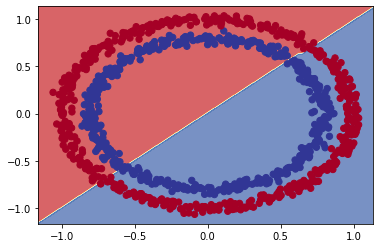

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(
    model=model_3,
    X=X,
    y=y
)

In [ ]:
# Our model is trying to draw a straight line, even though we want circles, maybe this model could work for a regression model instead